This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [4]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

-3은 왜 넣나? 과적합 방지 느낌. 이 데이터 셋에 의존하지 않도록 오프셋 부여

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

train_data[0], train_data[2]는 각각 길이가 다름. 모델에 넣을 때 이 길이를 맞춰줘야함. dimension 통해서 맞춰주는 것. 부족한 길이는 0으로 맞춤

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

backup words encoding?

In [15]:
len(train_data[0])

218

In [13]:
len(x_train[0]) #dimension이랑 길이가 동일해진 모습

10000

In [17]:
train_data.shape

(25000,)

In [16]:
x_train.shape

(25000, 10000)

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    #layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

layer 위층 두개 지우면 로지스틱임

**Compiling the model**

In [14]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 79ms/step - loss: 0.5053 - accuracy: 0.7918 - val_loss: 0.4049 - val_accuracy: 0.8594
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3311 - accuracy: 0.8953 - val_loss: 0.3311 - val_accuracy: 0.8782
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2614 - accuracy: 0.9184 - val_loss: 0.2963 - val_accuracy: 0.8877
Epoch 4/20
30/30 [==============================] - 1s 49ms/step - loss: 0.2202 - accuracy: 0.9285 - val_loss: 0.2874 - val_accuracy: 0.8845
Epoch 5/20
30/30 [==============================] - 1s 51ms/step - loss: 0.1895 - accuracy: 0.9409 - val_loss: 0.2773 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1668 - accuracy: 0.9491 - val_loss: 0.2936 - val_accuracy: 0.8790
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1487 - accuracy: 0.9546 - val_loss: 0.2758 - val_accuracy: 0.8849
Epoch 8/20
30

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

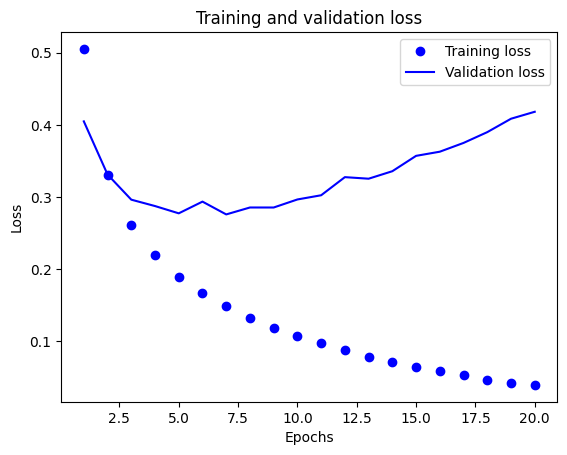

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

overfitting으로 의심해볼 수 있음.
로지스틱의 경우에는 테스트 셋 로스가 감소할 때 검증셋 로스가 감소하므로 문제가 없다고 할 수 있다.
히든레이어가 하나 추가될 때부터 문제가 생기는듯

유닛 수를 늘렸을 때 지그재그처럼 생김

**Plotting the training and validation accuracy**

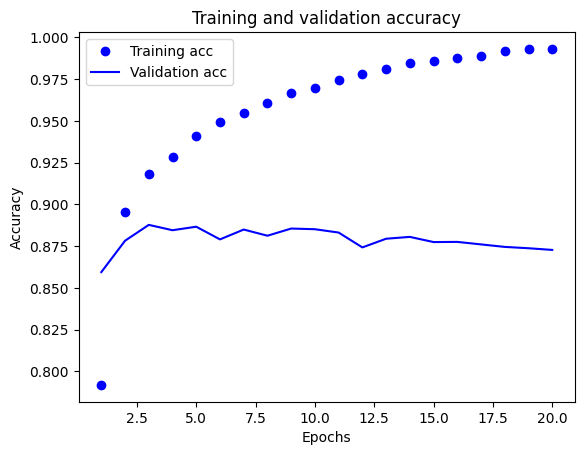

In [19]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epoch 4쯤으로 조정해보기

**Retraining a model from scratch**

In [25]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 21ms/step - loss: 0.4825 - accuracy: 0.8129
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2856 - accuracy: 0.8996
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2206 - accuracy: 0.9221
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2981 - accuracy: 0.8807


In [27]:
results

[0.2981056272983551, 0.8807200193405151]

### Using a trained model to generate predictions on new data

In [28]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.16939233],
       [0.9995479 ],
       [0.56620926],
       ...,
       [0.0631534 ],
       [0.06378434],
       [0.36836913]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [20]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [21]:
len(train_data)

8982

In [22]:
len(test_data)

2246

In [23]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [24]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 1us/step


In [31]:
train_labels[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

In [34]:
y_train[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 

### Preparing the data

**Encoding the input data**

In [26]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [27]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [28]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [35]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [36]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [37]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [60]:
y_val[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

**Training the model**

In [38]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 38ms/step - loss: 2.6341 - accuracy: 0.5043 - val_loss: 1.7653 - val_accuracy: 0.6130
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.5264 - accuracy: 0.6753 - val_loss: 1.3644 - val_accuracy: 0.6960
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.1975 - accuracy: 0.7304 - val_loss: 1.2052 - val_accuracy: 0.7230
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0008 - accuracy: 0.7765 - val_loss: 1.0935 - val_accuracy: 0.7620
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8391 - accuracy: 0.8151 - val_loss: 1.0312 - val_accuracy: 0.7710
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.7008 - accuracy: 0.8502 - val_loss: 0.9721 - val_accuracy: 0.7970
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5916 - accuracy: 0.8712 - val_loss: 0.9569 - val_accuracy: 0.7870
Epoch 8/20
16

**Plotting the training and validation loss**

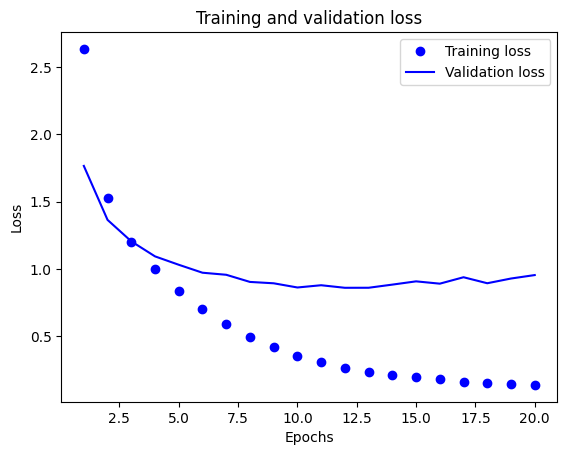

In [39]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

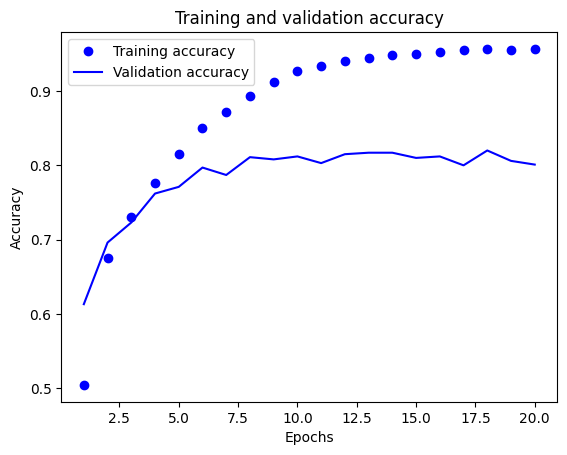

In [40]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [41]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.7458 - accuracy: 0.5051
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 1.5096 - accuracy: 0.6919
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 1.1302 - accuracy: 0.7571
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.9127 - accuracy: 0.8046
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7598 - accuracy: 0.8357
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6338 - accuracy: 0.8652
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.5322 - accuracy: 0.8871
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4485 - accuracy: 0.9048
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9314 - accuracy: 0.7876


In [42]:
results

[0.9313596487045288, 0.7876224517822266]

In [43]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1861086375779163

### Generating predictions on new data

In [44]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [45]:
predictions[0]

array([2.6147893e-05, 1.1655499e-04, 7.6266820e-06, 9.4596654e-01,
       4.4958085e-02, 1.9502662e-05, 4.3469746e-04, 1.7847833e-05,
       1.4197072e-03, 6.1001618e-05, 6.6972694e-05, 4.8693785e-04,
       3.6059099e-04, 2.1505050e-04, 4.9218670e-05, 4.6263085e-05,
       7.0063403e-04, 1.4817463e-04, 6.4373176e-05, 7.4413756e-04,
       1.6218381e-03, 6.6957182e-05, 1.1610318e-05, 8.8426273e-04,
       6.3910120e-05, 2.6944527e-04, 3.6707250e-05, 1.0289818e-04,
       9.5197834e-07, 4.5435001e-05, 2.5209551e-05, 3.0034580e-04,
       1.9291033e-06, 1.2777503e-05, 8.0568261e-06, 4.0484087e-05,
       1.0674593e-04, 1.3475386e-05, 9.8694527e-06, 3.3324846e-04,
       3.3524661e-06, 1.7794468e-05, 6.5690176e-05, 4.2477084e-05,
       1.0983338e-06, 3.4466684e-06], dtype=float32)

3번 인덱스의 확률값(9.4596654e-01)이 제일 큰 모습을 볼 수 있다.

In [46]:
predictions[0].shape

(46,)

In [47]:
np.sum(predictions[0])

1.0

In [48]:
np.argmax(predictions[0])

3

In [49]:
test_labels[0]

3

### A different way to handle the labels and the loss

In [50]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [51]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [52]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 3.0949 - accuracy: 0.2592 - val_loss: 2.6075 - val_accuracy: 0.2970
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 2.1708 - accuracy: 0.5178 - val_loss: 1.8568 - val_accuracy: 0.6560
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.4710 - accuracy: 0.6875 - val_loss: 1.4727 - val_accuracy: 0.6720
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.2046 - accuracy: 0.7162 - val_loss: 1.3981 - val_accuracy: 0.6800
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0869 - accuracy: 0.7397 - val_loss: 1.3421 - val_accuracy: 0.6900
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0004 - accuracy: 0.7539 - val_loss: 1.3229 - val_accuracy: 0.6940
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9330 - accuracy: 0.7607 - val_loss: 1.3247 - val_accuracy: 0.6960
Epoch 8/20
63/63 [=

categorical_crossentropy와 sparse_categorical_crossentropy의 차이를 이해해야함. chapter2를 참고. y레이블 알아서 convert하면(one-hot labeling을 수행하면) 전자를 사용함.

64, 4, 46의 경우에 추천되지 않는다. (왜지 사이즈가 안맞아서? 병목현상?)

1. directly use array([3,4 ... 이면 sparse_categ
one-hot encoding 했으면 categ
2.

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [53]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [54]:
train_data.shape

(404, 13)

In [55]:
test_data.shape

(102, 13)

In [56]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [57]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [58]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
all_scores

In [ ]:
np.mean(all_scores)

**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

### Wrapping up

## Summary